In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
df=pd.read_csv('../MachineLearning/vgsales.csv')

In [34]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [35]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [36]:
df=df.drop(columns=['Rank','Name','Platform','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)

In [37]:
df

,Year,Global_Sales
0,2006.0,82.74
1,1985.0,40.24
2,2008.0,35.82
3,2009.0,33.00
4,1996.0,31.37
...,...,...
16593,2002.0,0.01
16594,2003.0,0.01
16595,2008.0,0.01
16596,2010.0,0.01


In [38]:
df.isna().sum()

Year            271
Global_Sales      0
dtype: int64

In [39]:
df['Year'].mean()

2006.4064433147546

In [40]:
df['Year']=df['Year'].fillna(value=2006)

In [41]:
df['Year']=df['Year'].astype(np.int64)

In [42]:
df

,Year,Global_Sales
0,2006,82.74
1,1985,40.24
2,2008,35.82
3,2009,33.00
4,1996,31.37
...,...,...
16593,2002,0.01
16594,2003,0.01
16595,2008,0.01
16596,2010,0.01


In [61]:
X=df.iloc[:,:-1].values

In [62]:
X.reshape(-1,1)

array([[2006],
       [1985],
       [2008],
       ...,
       [2008],
       [2010],
       [2003]], dtype=int64)

In [63]:
Y=df.iloc[:,-1].values

In [64]:
Y.reshape(-1,1)

array([[8.274e+01],
       [4.024e+01],
       [3.582e+01],
       ...,
       [1.000e-02],
       [1.000e-02],
       [1.000e-02]])

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.5,random_state=3)

In [66]:
from sklearn.linear_model import LinearRegression
regress=LinearRegression()
regress.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred=regress.predict(x_test)

In [73]:
y_pred

array([0.50421189, 0.83330245, 0.39451504, ..., 0.48592909, 0.55906032,
       0.50421189])

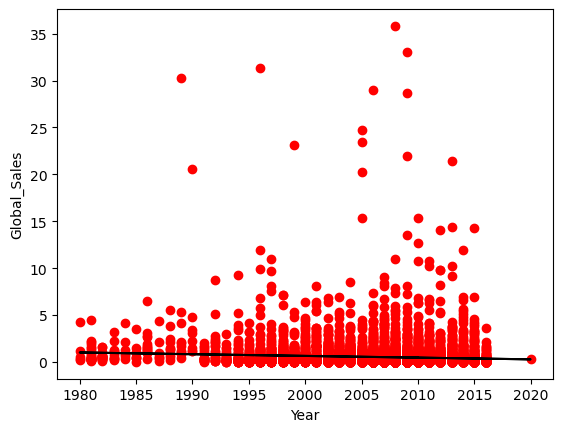

In [70]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regress.predict(x_train),color='black')
plt.xlabel('Year')
plt.ylabel('Global_Sales')
plt.show()

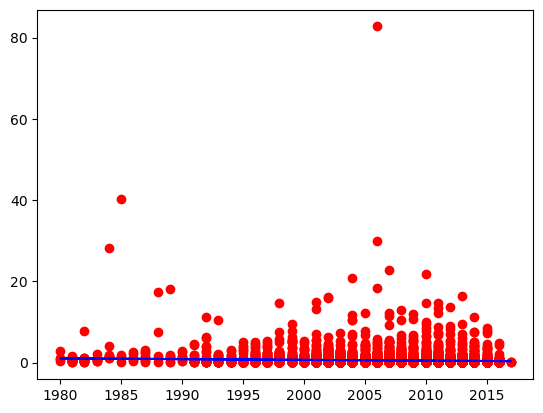

In [72]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regress.predict(x_test),color='blue')

In [ ]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

In [ ]:
m=len(X)

In [ ]:
number=0
denom=0
for i in range(m):
    number+=(X[i]-mean_x)*(Y[i]-mean_y) #here (x-x'(y-y') 
    denom+=(X[i]-mean_x)**2 #(x-x')^2
b1=number/denom
b0=mean_y-(b1*mean_x)

print(b1,b0)    

-0.02003965477793536 40.745000138418774


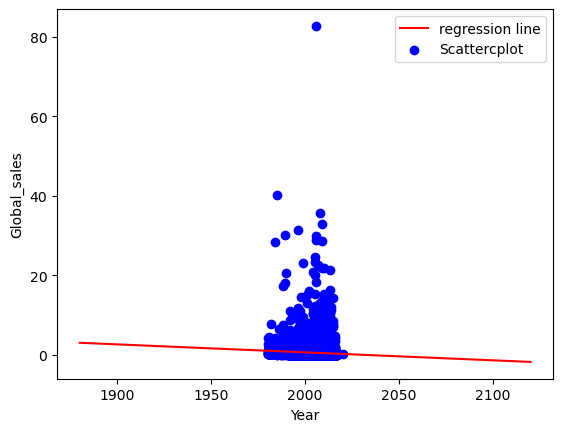

In [ ]:
max_x=np.max(X)+100
min_x=np.min(X)-100

x=np.linspace(min_x,max_x)
y=b0+b1*x


plt.plot(x,y,color='r',label="regression line")
plt.scatter(X,Y,color='b',label="Scattercplot")

plt.xlabel('Year')
plt.ylabel('Global_sales')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=X.values.reshape((m,1))
reg=LinearRegression()

reg=reg.fit(X,Y)

y_pred=reg.predict(X)

mse=mean_squared_error(Y,y_pred)
rmse=np.sqrt(mse)
r2_score=reg.score(X,Y)


In [ ]:
rmse

1.550659206863846

In [ ]:
r2_score

0.005551036099878615